# Lecture 4 Figures 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'axes.titlesize': 24,
             'axes.labelsize': 20,
             'xtick.labelsize': 12,
             'ytick.labelsize': 12,
             'figure.figsize': (8, 4.5)})

In [2]:
gdp = pd.read_csv('GDP.csv')
xr = pd.read_csv('gbp per usd.csv')

In [3]:
print(gdp.info())
gdp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    21 non-null     object 
 1   GDP     21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 464.0+ bytes
None


,DATE,GDP
0,2015-07-01,18347.425
1,2015-10-01,18378.803
2,2016-01-01,18470.156
3,2016-04-01,18656.207
4,2016-07-01,18821.359


In [4]:
print(xr.info())
xr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4395 entries, 0 to 4394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4395 non-null   object 
 1   Open       4378 non-null   float64
 2   High       4378 non-null   float64
 3   Low        4378 non-null   float64
 4   Close      4378 non-null   float64
 5   Adj Close  4378 non-null   float64
 6   Volume     4378 non-null   float64
dtypes: float64(6), object(1)
memory usage: 240.5+ KB
None


,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,1.723811,1.727205,1.718390,1.718597,1.718597,0.0
1,2003-12-02,1.719010,1.732112,1.717298,1.730313,1.730313,0.0
2,2003-12-03,1.730493,1.731812,1.725209,1.728101,1.728101,0.0
3,2003-12-04,1.727414,1.728997,1.718302,1.720697,1.720697,0.0
4,2003-12-05,1.720608,1.733102,1.719809,1.733102,1.733102,0.0


In [5]:
# changing names for merging later
gdp.rename(columns = {'DATE': 'Date'}, inplace = True)

# Creating datetimes
gdp['Date'] = pd.to_datetime(gdp.Date)
xr['Date']  = pd.to_datetime(xr['Date'])

# Trimming to 2019
gdp = gdp.loc[(gdp['Date'] >= '2019-01-01') & (gdp['Date'] < '2020-01-01')]
xr = xr.loc[(xr['Date'] >= '2019-01-01') & (xr['Date'] < '2020-01-01')]

# Checking for REQUIRED overlap in dates
gdp.Date.isin(xr.Date) 

14    True
15    True
16    True
17    True
Name: Date, dtype: bool

In [6]:
# Merging
gdp.set_index('Date', inplace = True)
xr.set_index('Date', inplace = True)

# Join requires same index
df = xr.join(gdp)
df

,Open,High,Low,Close,Adj Close,Volume,GDP
Date,,,,,,,
2019-01-01,1.275022,1.275673,1.271456,1.273804,1.273804,0.0,21115.309
2019-01-02,1.275234,1.277335,1.258463,1.275429,1.275429,0.0,NaN
2019-01-03,1.251878,1.263823,1.251878,1.252191,1.252191,0.0,NaN
2019-01-04,1.262897,1.273966,1.261782,1.262881,1.262881,0.0,NaN
2019-01-07,1.273285,1.278772,1.272426,1.273496,1.273496,0.0,NaN
...,...,...,...,...,...,...,...
2019-12-25,1.293494,1.298700,1.292300,1.293494,1.293494,0.0,NaN
2019-12-26,1.297185,1.301575,1.296126,1.297353,1.297353,0.0,NaN
2019-12-27,1.300289,1.311819,1.297219,1.300221,1.300221,0.0,NaN


In [7]:
# Dealing with missing values
df['GDP'].ffill(inplace = True)
df

,Open,High,Low,Close,Adj Close,Volume,GDP
Date,,,,,,,
2019-01-01,1.275022,1.275673,1.271456,1.273804,1.273804,0.0,21115.309
2019-01-02,1.275234,1.277335,1.258463,1.275429,1.275429,0.0,21115.309
2019-01-03,1.251878,1.263823,1.251878,1.252191,1.252191,0.0,21115.309
2019-01-04,1.262897,1.273966,1.261782,1.262881,1.262881,0.0,21115.309
2019-01-07,1.273285,1.278772,1.272426,1.273496,1.273496,0.0,21115.309
...,...,...,...,...,...,...,...
2019-12-25,1.293494,1.298700,1.292300,1.293494,1.293494,0.0,21747.394
2019-12-26,1.297185,1.301575,1.296126,1.297353,1.297353,0.0,21747.394
2019-12-27,1.300289,1.311819,1.297219,1.300221,1.300221,0.0,21747.394


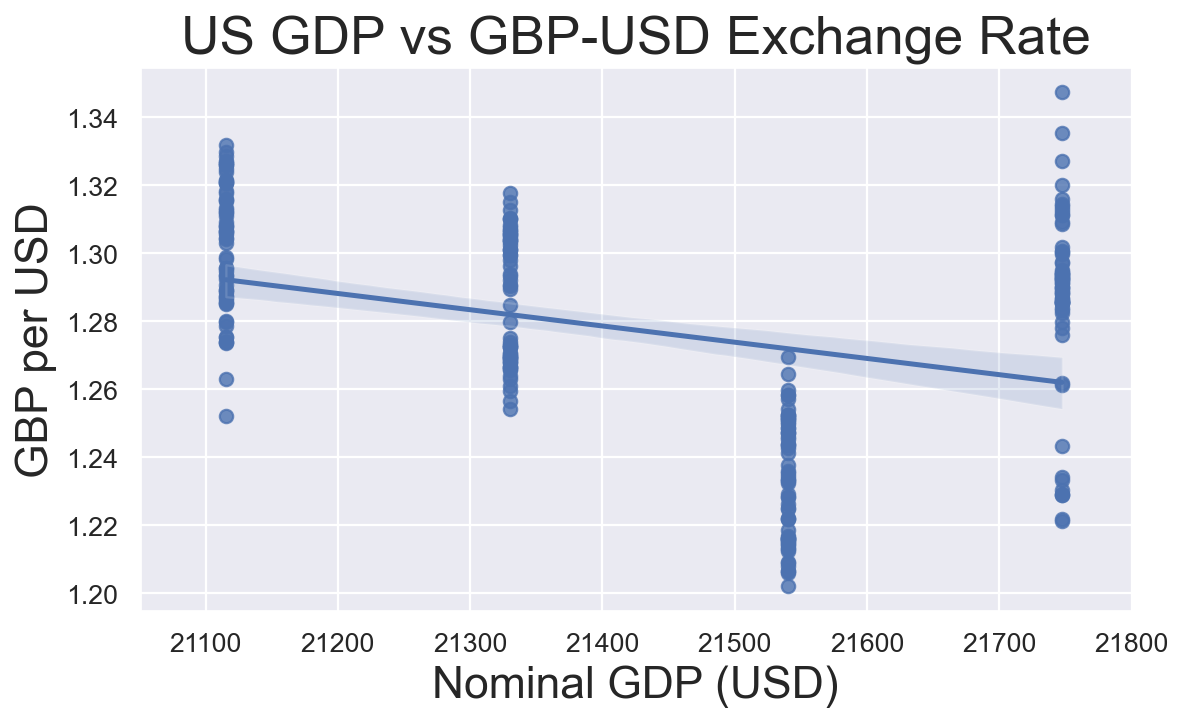

In [8]:
plt.figure(dpi = 160)
sns.regplot(x = 'GDP', y = 'Close', data = df)

plt.xlim((21050, 21800))
plt.xlabel('Nominal GDP (USD)')
plt.ylabel('GBP per USD')
plt.title('US GDP vs GBP-USD Exchange Rate')

plt.savefig('Time dimensions must match.png')